In [ ]:
# HW1. House price prediction using linear regression

# import library
import tensorflow as tf #수치 계산, 대규모 머신 러닝, 딥러닝, 기타 통계 및 예측 분석 워크로드 등 제공
import numpy as np #과학 계산을 위한 핵심 라이브러리, 기본 데이터 구조를 확장, 다차원 배열을 효과적으로 처리가능 (특히 ndarry 배열은 파이썬의 리스트에 비해 빠른 연산과 더 적은 메모리를 사용함)
import pandas as pd #엑셀의 데이터나, DBMS의 관계형 테이블 형태와 같은 표형태의 데이터를 쉽게 다룰 수 있고 분속을 용이하게 해줌
from sklearn.model_selection import train_test_split
#train_test_split sickit-learn의 모델 선택 모듈에서 train_test_split 함수를 가져옴. 이 함수는 데이터를 훈련 및 테스트 세트로 분할하는 데 사용됨


# X, Y
boston = pd.read_csv('Boston_house.csv') #"Boston_house.csv" 파일을 boston이라는 이름의 판다 데이터프레임에 읽어 넣기
X = boston[['CRIM','RM', 'LSTAT', 'AGE']] #보스턴 데이터프레임에서 특정 열을 선택하여 X라는 이름의 새 데이터프레임에 저장. 이 열은 예측에 사용할 기능을 나타냄.
y = boston[['Target']] #보스턴 데이터프레임에서 "Target" 열을 선택하고 y라는 이름의 새 데이터프레임에 저장. 이 변수는 예측하고자 하는 목표 변수인 주택 가격임.

#print(X)
#print(y)

#train = 학습 / test = 테스트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #train_test_split: 데이터를 학습용 데이터와 테스트용 데이터로 나누는 함수
# test_size : 테스트 데이터셋의 크기를 결정. 이 값은 0과 1 사이의 실수로 정의. 예를 들어, test_size=0.2로 지정하면 전체 데이터셋의 20%를 테스트 데이터셋으로 사용함.
# random_state : 데이터를 나눌 때 사용되는 난수 시드. 이 값을 지정하지 않으면, 매번 실행할 때마다 다른 결과를 얻을 수 있음.


X_train = np.array(X_train, dtype=np.float32) #데이터 행렬화
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)


In [ ]:
# Model parameter
# 모델 파라미터를 작성하세요.
num_features = X_train.shape[1]  #train 데이터에서 특정열의 2번째 데이터를 가져옴, 가중치 행렬W의 크기를 정의하는데 사용함
W = tf.Variable(tf.random.normal((num_features, 1)))  # 랜덤값으로 초기화
# 가중치 행렬 W를 텐서플로우 변수로 초기화. 이 행렬은 각 피처에 대한 가중치를 보유하며, 그 모양은 아래와 같음,
#( 피처 수, 1). 가중치는 tf.random.normal을 사용하여 무작위 값으로 초기화됨.
b = tf.Variable(tf.zeros((1, 1)))  # 0값으로 b값 초기화 zeros(묶음개수, 묶음안의 개수)


#print(num_features)

#print(W)
#print(b)


# learning rate
# 적당한 learning rate를 선택하세요.
learning_rate = 0.0001 #기울기 값에대한 변화량을 얼마만큼 기여할지
#0.00000001 = 이상해짐
#0.000001 = 500정도에 수렴
#0.00001 = 이상해짐
#0.0001 = 50정도에수렴
#0.0001 = 25정도에 수렴 <BEST>



# Gradient descent
def gradientDescent(): #경사하강법 함수정의
  with tf.GradientTape() as tape: #with [expression] as [변수명]
  #GradientTape(): TensorFlow의 자동 미분 기능을 사용하기 위해 GradientTape 컨텍스트를 생성

# 학습 모델 및 학습 알고리즘(Gradient descent)를 구현하세요.
# Predict(예측) using linear regression(선형회귀) equation(방정식)
        pred = tf.matmul(X_train, W) + b #선형 회귀 식을 이용하여 예측값 계산

        # Calculate the cost function (mean squared error) 비용함수 계산(평균 제곱 오차)
        cost = tf.reduce_mean(tf.square(pred - y_train)) #평균 제곱 오차(MSE)를 계산하여 모델의 성능을 평가
          # (pred - y_train) =예측값 -실제값 = 오차
          # tf.square = 제곱 (오차^2)
          # tf.reduce_mean = 평균

        # Calculate gradients with respect to weights and bias
        dW, db = tape.gradient(cost, [W, b]) #Gradient(기울기) Tape(기록)
          # tape에 gradient메서드를 실행하여 cost에 대한 W와b의 편미분 값을 tuple로 전달.

        # Update weights(가중치) and bias(편향) using gradient descent(경사하강법)
        W.assign_sub(learning_rate * dW) # W변수에 assign_sub()만큼의 값을 뺀 나머지를 할당
        b.assign_sub(learning_rate * db) # b변수에 assign_sub()만큼의 값을 뺀 나머지를 할당
        # 계산된 기울기를 이용하여 가중치와 편향 업데이트. learning_rate 곱해서 업데이트 크기를 조절함.

#print(W.assign_sub)


# Training loop
cost = []
for step in range(3001):
  #default: 10001
  # 3001 = 정확함. (이하값은 오차율 높음)

  gradientDescent() #상단 for문으로 반복호출하여 모델 학습

# Calculate prediction for test data after each training step
  pred = tf.matmul(X_test,W) + b #테스트 예측값

# Calculate and store cost for visualization (optional)
  cost_inst = tf.reduce_mean(tf.square(pred - y_test)) #테스트용 비용함수 계산
  cost = np.append(cost, cost_inst) #cost 배열과 cost_inst 배열 이어붙임
  # 예측값과 실제 값 사이의 MSE를 계산하여 cost 리스트에 저장


  #print("qw", cost_inst)
  #print("er", cost)




"\nimport tensorflow as tf\nimport numpy as np\n\n# 데이터 준비 (예시)\n# 가정: X는 입력 데이터, y는 원-핫 인코딩된 정답 레이블\nX = ...  # (샘플 수, 특징 수)\ny = ...  # (샘플 수, 클래스 수)\n\n# 모델 구조 정의\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Dense(units=10, activation='relu', input_shape=(X.shape[1],)),  # 은닉층\n    tf.keras.layers.Dense(units=num_classes, activation='softmax')  # 출력층\n])\n\n# 손실 함수 및 최적화 알고리즘 설정\n# cross-entropy 직접 구현\ndef cross_entropy_loss(y_true, y_pred):\n    return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))\n\noptimizer = tf.keras.optimizers.Adam(learning_rate=0.001)\n\n# 모델 학습\nepochs = 10\nfor epoch in range(epochs):\n    with tf.GradientTape() as tape:\n        # 예측값 계산\n        predictions = model(X)\n        # 손실 함수 계산\n        loss = cross_entropy_loss(y, predictions)\n    # 가중치 업데이트\n    gradients = tape.gradient(loss, model.trainable_variables)\n    optimizer.apply_gradients(zip(gradients, model.trainable_variables))\n"

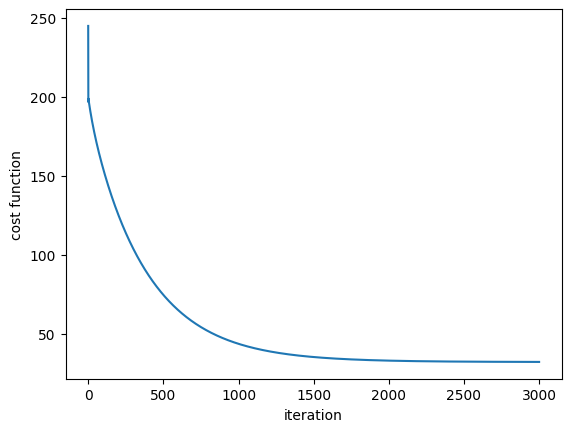

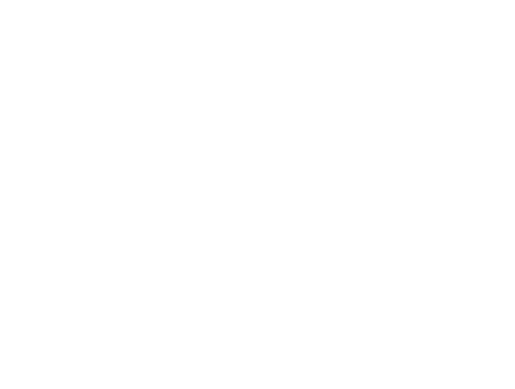

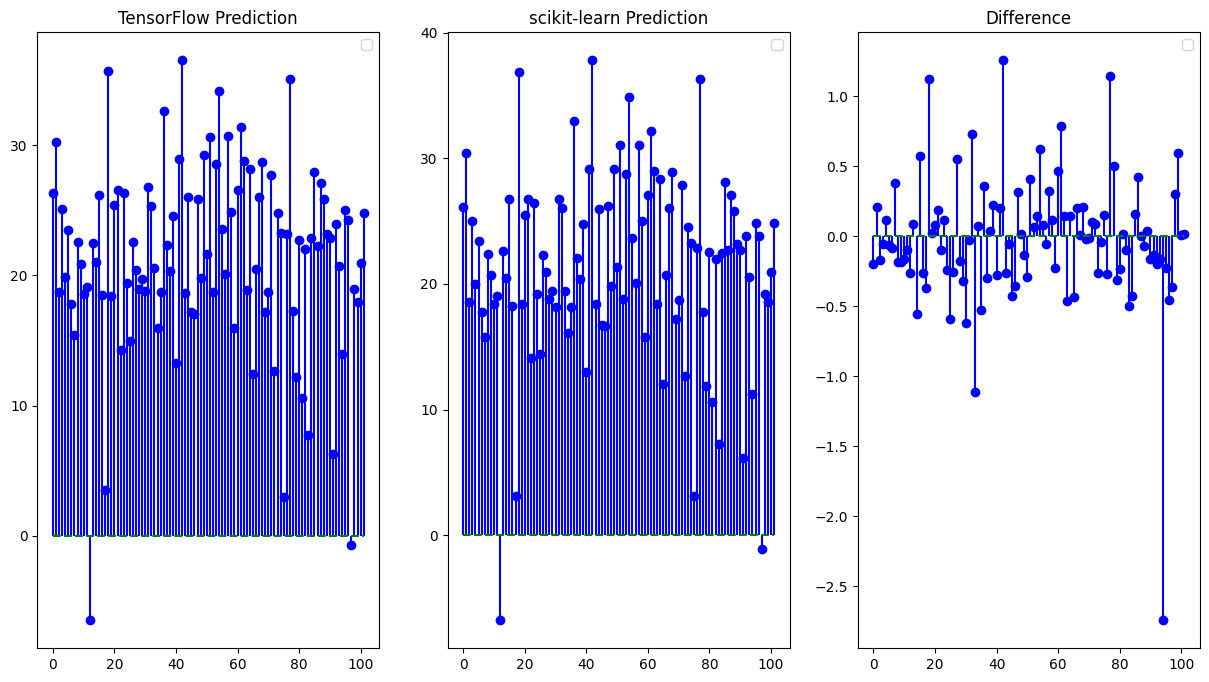

error.numpy() =  0.21276687


In [ ]:
import matplotlib.pyplot as plt


# plot cost function
plt.plot(cost) #cost 값 점선 그래프
plt.xlabel('iteration') #반복
plt.ylabel('cost function') #비용함수
plt.show() #그래프 시각화


# Comparison with scikit-learn linear regression (사이킷런 선형회귀와 비교)
#scikit-learn(사이킷런)은 파이썬을 대표하는 머신러닝 분석을 할 때 유용하게 사용할 수 있음
from sklearn.linear_model import LinearRegression #sklearn.linear_model 모듈안에있는 LinearRegression를 import
#동일한 데이터로 학습시키고 TensorFlow 모델의 예측 결과와 비교하기

reg = LinearRegression() # Scikit-learn의 선형 회귀 모델 객체를 생성 (새로운 선형 회귀를 만들 준비)
reg.fit(X_train, y_train) #생성된 모델을 학습 데이터 X_train과 y_train으로 학습시키기 (fit=학습을 시키는 함수, 학습을 하면서 모델생성 -모델완성) / reg(모델)
pred_lib = reg.predict(X_test) #학습된 모델을 이용하여 테스트 데이터 X_test에 대한 예측을 수행하고, 결과를 pred_lib에 저장

pred_nolib = tf.matmul(X_test,W) + b #앞서 구현한 TensorFlow 모델을 이용하여 테스트 데이터 X_test에 대한 예측을 수행
#tf.matmul()는 행렬곱

# Plot predictions (optional) 플롯 예측
fig, axs = plt.subplots(1, 3) #Matplotlib을 이용하여 1행 3열의 서브플롯 생성. 각 서브플롯은 다른 예측 결과를 나타냄.
for ax in axs:
    ax.set_axis_off() #빈 슬롯 제거

# Figure 크기 설정 및 서브플롯 생성
fig = plt.figure(figsize=(15, 8))  # 가로 15인치, 세로 8인치
axs = fig.subplots(1, 3)


# 서브플롯 간격 조절
plt.subplots_adjust(wspace=0.2)


#각 서브플롯에 예측 결과를 stem plot으로 시각화
axs[0].stem(pred_nolib, linefmt='b-', markerfmt='bo', basefmt='g--') #pred_nolib: TensorFlow 모델의 예측 결과
axs[1].stem(pred_lib, linefmt='b-', markerfmt='bo', basefmt='g--') #pred_lib: Scikit-learn 모델의 예측 결과
axs[2].stem(pred_lib-pred_nolib, linefmt='b-', markerfmt='bo', basefmt='g--') #pred_lib-pred_nolib: 두 모델의 예측 결과 차이


# 각 서브플롯에 제목과 범례를 추가하여 시각화 결과를 명확하게 표현
axs[0].set_title('TensorFlow Prediction')
axs[1].set_title('scikit-learn Prediction')
axs[2].set_title('Difference')
axs[0].legend()
axs[1].legend()
axs[2].legend()


plt.show() #그래프 시각화



# Calculate error between TensorFlow and scikit-learn predictions
error = tf.reduce_mean(tf.square(pred_nolib - pred_lib)) #두 모델의 예측 결과 차이의 제곱의 평균을 계산하여 오차 구하기
print("error.numpy() = ",error.numpy()) #계산된 오차 출력
